# 🧭 雷达图 (Radar Chart) - 多维指标对比

## 什么是雷达图？

雷达图将多个维度沿圆周展开，用多边形面积和形状对比对象在各指标上的**综合表现差异**。

## 适用场景

| 场景 | 示例 |
|------|------|
| 多维能力对比 | 国家奖牌结构、球队攻防指标 |
| 模型指标对比 | Accuracy/Recall/F1/AUC 等 |
| 指标权衡展示 | 方案优选的多指标平衡 |

## 使用建议

- **先做归一化**：各指标量纲不同必须统一到 0-1
- **维度不要太多**：4-8 维最清晰，避免信息过载
- **对比对象不宜过多**：3-6 条曲线最佳


## 示例：2024 奥运奖牌多维对比（25C 数据）

使用 `processed_medal_data.csv` 中 2024 年的金/银/铜/总奖牌指标，对比主要国家奖牌结构。


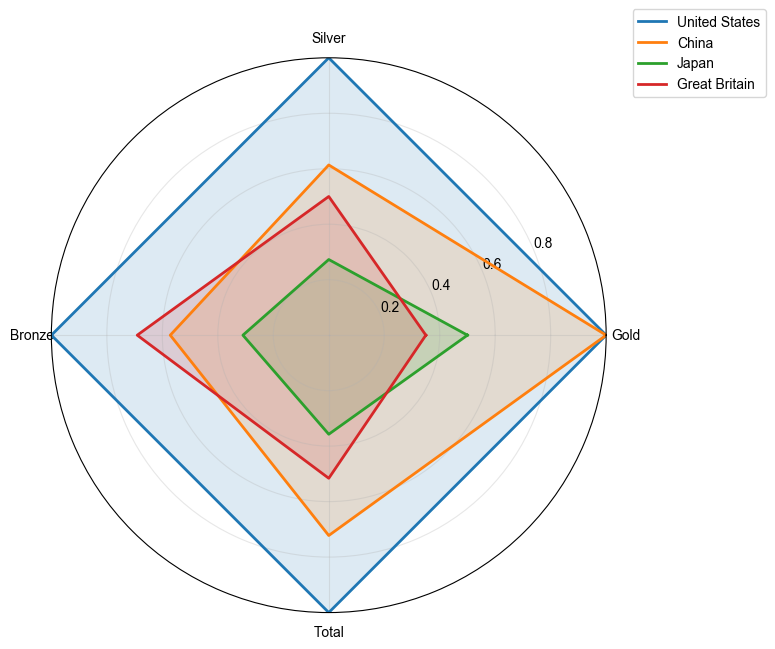

In [1]:
# ============================================
# 雷达图示例 - 奖牌多维对比
# ============================================

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示（解决中文乱码问题）
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

data_path = Path("../../Simulation/25C/processed_medal_data.csv")
df = pd.read_csv(data_path)

year = 2024
countries = ["United States", "China", "Japan", "Great Britain"]
metrics = ["Gold", "Silver", "Bronze", "Total"]

data = (
    df[(df["Year"] == year) & (df["NOC"].isin(countries))]
    .set_index("NOC")[metrics]
    .reindex(countries)
)

# 归一化到 0-1 便于雷达图对比
data_norm = data / data.max()

labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for country in countries:
    values = data_norm.loc[country].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=country)
    ax.fill(angles, values, alpha=0.15)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"])
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
